In [226]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicHermiteSpline
import sympy as sym
sym.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Edwar Isaías Pacheco Rojas
### Documento: CC 1017240283
*Métodos computacionales 2024-II*

---

In [227]:
def polinomio_lagrange(x_vals, y_vals):

  """
  Docstring!
  """

  # Polinomios base de Lagrange
  polinomios_lagrange = []  # L_0(x), L_1(x),..., L_n(x).

  x = sym.symbols('x')
  # Generar los polinomios base de Lagrange L_i(x)
  for i in range(len(x_vals)):
    L_i = 1  # Inicialización del polinomio
    for j in range(len(x_vals)):
      if i != j:
        L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

    polinomios_lagrange.append(L_i)

  polinomio_final = sum(L_i * y_vals[i] for i, L_i in enumerate(polinomios_lagrange))

  return polinomio_final



In [228]:
# Error de interpolación en polinomio de Lagrange
def error_r_n(f, valores, e=1):

  """
  Polinomio para calcular el error de una interpolación de Lagrange.

  Args:
    :f: función que se quiere aproximar
    :e: valor entre el intervalo de interpolación en el manejo de error
    :valores: conjunto de puntos en los cuales es evaluado la función de error

  returns:
    :R_n: polinomio de error en la intepolación de Lagrange
  """
  x = sym.symbols('x')
  n = sym.symbols('n')
  f_prime_n = sym.diff(f, x, len(valores))  # len(valores): orden de la derivada

  # Productos (x-x0)(x-x1)...
  producto = 1
  for i in valores:
    producto *= (x - i)

  return (f_prime_n.subs(x, e) / sym.factorial(len(valores) + 1)) * producto



In [229]:
def hermite_interpolation(x_points, y_points, derivatives):

  """
  Interpolación de Hermite a partir de la fórmula.

  Args:
    x_points (list): Lista de puntos x donde se evalúa la función.
    y_points (list): Lista de valores f(x) en los puntos x.
    derivatives (list): Lista de derivadas f'(x) en los puntos x.

  Returns:
    sympy expression: El polinomio de Hermite.
  """

  x = sym.symbols('x')  # Variable simbólica
  n = len(x_points)     # Número de puntos de interpolación
  H = 0                 # Inicializar el polinomio de Hermite

  for i in range(n):
    # Polinomio base de Lagrange h_i(x)
    h_i = 1
    for j in range(n):
      if j != i:
        h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])

    # Derivada de h_i(x) evaluada en x_i
    h_i_prime = sym.diff(h_i, x).subs(x, x_points[i])

    # Términos del polinomio de Hermite
    term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
    term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]

    # Sumar el término al polinomio total
    H += term1 + term2

  return sym.simplify(H)



In [230]:
def error_hermite(f, valores, e=1):

  """
  Función de error para la interpolación por el método de Hermite.

  Args:
    :f: función que está siendo aproximada
    :valores: puntos de base para la interpolación
    :e: algún punto en el intervalo de interpolación

  Returns:
    :R: polinomio de error para la interpolación de Hermite.
  """

  n = sym.symbols('n')
  x = sym.symbols('x')

  g = sym.diff(f, x, 2 * len(valores) + 2) / sym.factorial(2 * len(valores) + 2)

  # Tamaño del error
  producto = 1
  for xi in valores:
    producto *= (x - xi) ** 2

  return g.subs(x, e) * producto



In [231]:
def diferencias_divididas(x, y):
    """
    Calcula la tabla de diferencias divididas.

    Parámetros:
    x: array de puntos x
    y: array de valores f(x)

    Retorna:
    coef: array de coeficientes para el polinomio de Newton
    """
    n = len(x)
    coef = y
    tabla = np.zeros((n, n))
    tabla[:,0] = y

    for j in range(1, n):
        for i in range(n-j):
            tabla[i,j] = (tabla[i+1,j-1] - tabla[i,j-1]) / (x[i+j] - x[i])

    # Los coeficientes son la primera fila de la tabla
    coef = tabla[0,:]
    return tabla, coef


In [232]:
def polinomio_newton(x_vals, coef):

  """
  Retorna el polinomio de Newton para una serie de valores.

  Args:
    :x: valores por los que debe pasar el polinomio
    :coef: coeficientes asociados al polinomio de Newton

  Returns:
    :N: polinomio simbólico de interpolación de Newton
  """

  x = sym.symbols('x')

  n = len(x_vals)
  poli = coef[0]

  for i in range(1, n):
    termino = coef[i]
    for j in range(i):
      termino *= (x - x_vals[j])
    poli += termino

  return poli



# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange, definido como

$$ P(x) = \sum_{i=0}^n y_i \cdot l_i(x) $$

donde $l_i(x)$ es el polinomio base de Lagrange:

$$ l_i(x) = \prod_{j=0, j \neq i}^n \frac{x - x_j}{x_i - x_j} $$ y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{f^{(n)}(\xi)}{(n+1)!} (x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

Dado que la tercera derivada de $\sin(x)$ es $-\sin(x)$, tenemos:

$$
R_3(x) = \frac{-\sin(\xi)}{24} (x - 0)(x - \frac{\pi}{2})(x - \pi)
$$



In [233]:
# Variable simbólica
x = sym.symbols('x')

# Polinomio del error asociado
f = sym.sin(x)

# Puntos (x_i, y_i) por los que pasa la función interpolada
puntos = [(0, 0), (np.pi / 2, 1), (np.pi, 0)]  # Puntos dados (también se pueden
                                               # generar por f(x) = np.sin(x)
# Coordenadas x e y
x_vals = [0, sym.pi / 2, sym.pi]  # Objetos de sympy para manipulación simbólica
y_vals = [0, 1, 0]

# Valores necesarios
f_prime_vals = [1, 0, -1]  # Valores de la función en su derivada.

In [234]:
# Polinomios base de Lagrange
polinomios_lagrange = []  # L_0(x), L_1(x),..., L_n(x).

# Generar los polinomios base de Lagrange L_i(x)
for i in range(len(puntos)):
  L_i = 1  # Inicialización del polinomio
  for j in range(len(puntos)):
    if i != j:
      L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

  polinomios_lagrange.append(L_i)

# Mostrar cada polinomio de Lagrange
for i in range(len(puntos)):
  print(f'L_{i}(x)')
  display(sym.expand(polinomios_lagrange[i]))
  print(5*'----')

polinomio_final = sum(L_i * y_vals[i] for i, L_i in enumerate(polinomios_lagrange))
P = sym.expand(polinomio_final)
print(f'Polinomio de Lagrande para f(x) = sin(x) con los puntos dados:')
display(P)

L_0(x)


   2          
2⋅x    3⋅x    
──── - ─── + 1
  2     π     
 π            

--------------------
L_1(x)


     2      
  4⋅x    4⋅x
- ──── + ───
    2     π 
   π        

--------------------
L_2(x)


   2    
2⋅x    x
──── - ─
  2    π
 π      

--------------------
Polinomio de Lagrande para f(x) = sin(x) con los puntos dados:


     2      
  4⋅x    4⋅x
- ──── + ───
    2     π 
   π        

In [235]:
print("El polinomio R_n(x) para calcular el error de interpolación es: ")
R_n = error_r_n(f, x_vals)
display(R_n)

El polinomio R_n(x) para calcular el error de interpolación es: 


           ⎛    π⎞        
-x⋅(x - π)⋅⎜x - ─⎟⋅cos(1) 
           ⎝    2⎠        
──────────────────────────
            24            

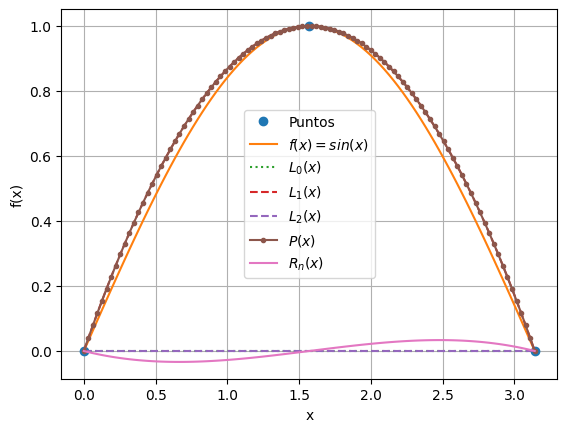

In [236]:
# Gráficos de las funciones involucradas en la interpolación
# Convertir en funciones
L_0 = np.vectorize(sym.lambdify(x, polinomios_lagrange[0]*y_vals[0]))
L_1 = np.vectorize(sym.lambdify(x, polinomios_lagrange[1]*y_vals[1]))
L_2 = np.vectorize(sym.lambdify(x, polinomios_lagrange[2]*y_vals[2]))
P = np.vectorize(sym.lambdify(x, polinomio_final))
# Error de interpolación
R_n_H = sym.lambdify(x, R_n, 'numpy')

dominio = np.linspace(0, np.pi, 100)
funcion = np.sin(dominio)

# Gráficos
plt.plot(x_vals, y_vals, 'o', label='Puntos')
plt.plot(dominio, funcion, '-', label='$f(x) = sin(x)$')
plt.plot(dominio, L_0(dominio), linestyle=':', label='$L_0(x)$')
plt.plot(dominio, L_1(dominio), '--', label='$L_1(x)$')
plt.plot(dominio, L_2(dominio), '--', label='$L_2(x)$')
plt.plot(dominio, P(dominio), '.-', label='$P(x)$')
plt.plot(dominio, R_n_H(dominio), label='$R_n(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:

## Polinomio de Hermite

Para un conjunto de puntos $x_0, x_1, \dots, x_n$, con valores $f(x_0), f(x_1), \dots, f(x_n)$ y derivadas $f'(x_0), f'(x_1), \dots, f'(x_n)$, el polinomio de Hermite $H(x)$ está dado por:

$$
H(x) = \sum_{i=0}^{n} \left( h_i^2(x)(1 - 2(x - x_i)h_i'(x_i))f(x_i) + h_i^2(x)(x - x_i)f'(x_i) \right)
$$

donde:

- $h_i(x)$ es la base de Lagrange definida como:

$$h_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^n \frac{x - x_j}{x_i - x_j}$$

- $h_i'(x_i)$ es la derivada de $h_i(x)$ evaluada en el punto $x_i$, y el error se define como:

$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [237]:
polinomio_hermite = hermite_interpolation(x_vals, y_vals, f_prime_vals)

# Polinomio de Hermite
print('Polinomio de interpolación de Hermite para la función f(x) = sin(x):')
display(polinomio_hermite)

print("Polinomio de Hermite simplificado: ")
display(sym.simplify(sym.expand(polinomio_hermite)))

Polinomio de interpolación de Hermite para la función f(x) = sin(x):


  ⎛                   2               2          2          2⎞
x⋅⎝x⋅(π - x)⋅(2⋅x - π)  + 16⋅x⋅(x - π)  + (x - π) ⋅(2⋅x - π) ⎠
──────────────────────────────────────────────────────────────
                               4                              
                              π                               

Polinomio de Hermite simplificado: 


  ⎛    3        2              2                3      4⎞
x⋅⎝16⋅x  - 4⋅π⋅x ⋅(x + 8) + 8⋅π ⋅x⋅(x + 2) - 5⋅π ⋅x + π ⎠
─────────────────────────────────────────────────────────
                            4                            
                           π                             

In [238]:
# Error por interpolación de Hermite
print("Error en la interpolación de Hermite: ")
display(sym.simplify(sym.expand(error_hermite(f, x_vals))))

Error en la interpolación de Hermite: 


 2 ⎛   4         3       2  2      3      4⎞       
x ⋅⎝4⋅x  - 12⋅π⋅x  + 13⋅π ⋅x  - 6⋅π ⋅x + π ⎠⋅sin(1)
───────────────────────────────────────────────────
                      161280                       

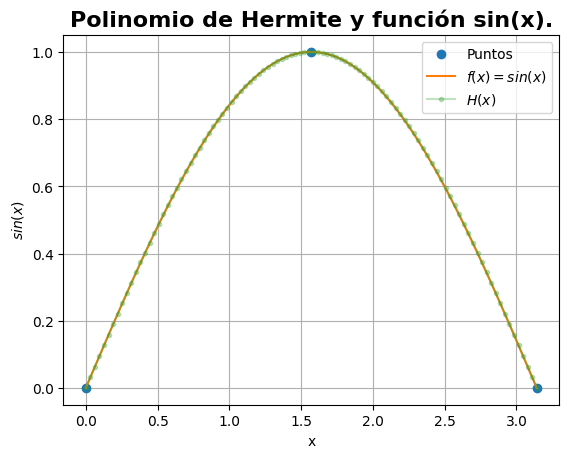

In [239]:
# Gráficos por interpolación de Hermite
funcion_hermite = sym.lambdify(x, polinomio_hermite, 'numpy')

plt.title('Polinomio de Hermite y función sin(x).', fontsize=16, fontweight='bold')
plt.plot(x_vals, y_vals, 'o', label='Puntos')
plt.plot(dominio, funcion, '-', label='$f(x) = sin(x)$')
plt.plot(dominio, funcion_hermite(dominio), '.-', label='$H(x)$', alpha=0.3)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$sin(x)$')
plt.grid()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [240]:
# Puntos dados
energia = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

In [241]:
# Definición de función
sig_0, sigma, e, e_r, gamma = sym.symbols('sigma_0 sigma E E_r Gamma')
f_sigma = sym.Function('σ')  # Función sigma
f_sig_0 = sym.Function('sigma_0')  # Función sigma_0

# Expresión algebraica
expr = sig_0 / ((e - e_r) ** 2 + gamma ** 2 / 4)

# Ecuación
f_energia = sym.Eq(f_sigma(e), expr)
print("Función de sección eficaz: ")
display(f_energia)

print()
# Resolver para sig_0
sol_sig_0 = sym.solve(f_energia, sig_0)  # Solución que se convierte en función lambda

f_sig_0 = sym.Eq(f_sig_0(e), sol_sig_0[0])  # Ecuación par sigma_0
print("Cálculo de σ0 a partir de los valores conocidos: ")
display(f_sig_0)

Función de sección eficaz: 


             σ₀      
σ(E) = ──────────────
        2            
       Γ            2
       ── + (E - Eᵣ) 
       4             


Cálculo de σ0 a partir de los valores conocidos: 


        ⎛ 2             2⎞     
        ⎝Γ  + 4⋅(E - Eᵣ) ⎠⋅σ(E)
σ₀(E) = ───────────────────────
                   4           

In [242]:
# Calculo de sigma_0
sig_0_lambda = sym.lambdify((gamma, e, e_r, f_sigma(e)), sol_sig_0[0], 'numpy')
# Valores de sig_0
vals_sig_0 = sig_0_lambda(55, energia, 78, sigma_exp)  # Valores de sig_0 a partir de los datos de la tabla
print("Valores de sigma_0 para cada par de valores de energía y sigma_exp: ")
vals_sig_0

Valores de sigma_0 para cada par de valores de energía y sigma_exp: 


array([72506.65  , 57044.    , 69311.25  , 63898.375 , 65485.2   ,
       59008.475 , 64154.7   , 83863.3125, 73509.175 ])

In [243]:
# Polinomio de Lagrange para la interpolación de la función sección eficaz
polinomio_final = polinomio_lagrange(energia, sigma_exp)  # Interpolación por la función polinomio_lagrange

#
lagrange_seccion_eficaz = sym.simplify(sym.expand(polinomio_final))
lagrange_seccion_eficaz = lagrange_seccion_eficaz.subs(x, e)  # Cambio de variable
print(f'Polinomio de Lagrande como interpolación a la función de sección eficaz: ')
display(lagrange_seccion_eficaz)

Polinomio de Lagrande como interpolación a la función de sección eficaz: 


                        8                         7                        6                       ↪
- 1.15516952380952e-13⋅E  + 9.97636063492064e-11⋅E  - 3.54296888888889e-8⋅E  + 6.63147377777778e-6 ↪

↪   5                         4                       3                     2                      ↪
↪ ⋅E  - 0.000694254622222223⋅E  + 0.0395537377777778⋅E  - 1.09330293650794⋅E  + 11.4071380952381⋅E ↪

↪        
↪  + 10.6

In [244]:
## Polinomio de interpolación de Hermite
# Derivada de la función de sección eficaz
expr_prime = sym.diff(expr, e)  # Derivada de la expresión teórica para la sección eficaz
expr_prime_lambda = sym.lambdify((sig_0, e, e_r, gamma), expr_prime, 'numpy')

# Valores de la derivada de sigma(E) en los puntos datos
derivadas_sigma_exp = expr_prime_lambda(vals_sig_0, energia, 78, 55)

hermite_seccion_eficaz = hermite_interpolation(energia, sigma_exp, derivadas_sigma_exp)
hermite_seccion_eficaz = sym.simplify(hermite_seccion_eficaz.subs(x, e))
display(hermite_seccion_eficaz)

                      17                         16                         15                     ↪
3.37286811178186e-29⋅E   - 5.79516274106351e-26⋅E   + 4.55888239447762e-23⋅E   - 2.17534973079342e ↪

↪      14                         13                         12                         11         ↪
↪ -20⋅E   + 7.03104751602585e-18⋅E   - 1.62788652387863e-15⋅E   + 2.78400573228573e-13⋅E   - 3.573 ↪

↪                  10                        9                       8                        7    ↪
↪ 84493577878e-11⋅E   + 3.46405501266309e-9⋅E  - 2.5287914928231e-7⋅E  + 1.37514388731485e-5⋅E  -  ↪

↪                       6                       5                     4                     3      ↪
↪ 0.000545387829616931⋅E  + 0.0152214321802636⋅E  - 0.28128356863276⋅E  + 3.06805966030896⋅E  - 14 ↪

↪                 2                             
↪ .8583278589871⋅E  + 0.241745550235737⋅E + 10.6

In [245]:
# Polinomio de interpolación de Newton
tabla, coef = diferencias_divididas(energia, sigma_exp)

newton_seccion_eficaz = polinomio_newton(energia, coef)
newton_seccion_eficaz = newton_seccion_eficaz.subs(x, e)
display(sym.simplify(newton_seccion_eficaz))

                        8                         7                        6                       ↪
- 1.15516952380952e-13⋅E  + 9.97636063492064e-11⋅E  - 3.54296888888889e-8⋅E  + 6.63147377777778e-6 ↪

↪   5                         4                       3                     2                      ↪
↪ ⋅E  - 0.000694254622222222⋅E  + 0.0395537377777778⋅E  - 1.09330293650794⋅E  + 11.4071380952381⋅E ↪

↪        
↪  + 10.6

In [246]:
# Polinomios de interpolación y función de sección eficaz
seccion_eficaz = sym.lambdify((e, e_r, gamma, sig_0), expr, 'numpy')  # Función lambda de sección eficaz
lagrange_seccion_eficaz_lamb = sym.lambdify(e, lagrange_seccion_eficaz, 'numpy')  # Función lambda del polinomio de Lagrange
hermite_seccion_eficaz_lamb = sym.lambdify(e, hermite_seccion_eficaz, 'numpy')  # Polinomio de Hermite
newton_seccion_eficaz_lamb = sym.lambdify(e, newton_seccion_eficaz, 'numpy')  # polinomio de Newton

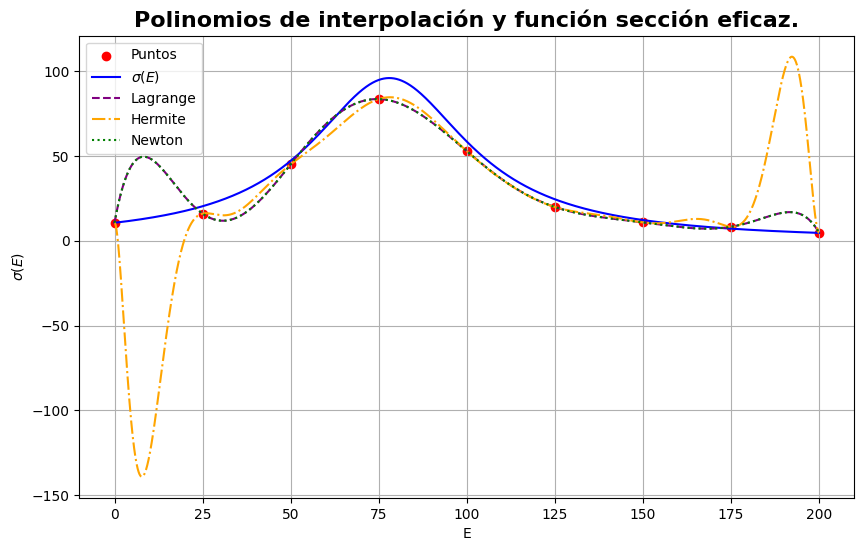

In [247]:
# Gráficos
dom_energia = np.linspace(min(energia), max(energia), 10000)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Polinomios de interpolación y función sección eficaz.', fontsize=16, fontweight='bold')
# plt.figure(figsize=(14, 9))
ax.scatter(energia, sigma_exp, color='r', label='Puntos')
ax.plot(dom_energia, seccion_eficaz(dom_energia, 78, 55, vals_sig_0[0]), 'b', linestyle='-', label=r'$\sigma(E)$')
ax.plot(dom_energia, lagrange_seccion_eficaz_lamb(dom_energia), 'purple', linestyle='--', label='Lagrange')
ax.plot(dom_energia, hermite_seccion_eficaz_lamb(dom_energia), 'orange', linestyle='-.', label='Hermite')
ax.plot(dom_energia, newton_seccion_eficaz_lamb(dom_energia), 'green', linestyle=':', label='Newton')
ax.set_xlabel('E')
ax.set_ylabel(r'$\sigma(E)$')
ax.legend()
ax.grid()
plt.show()

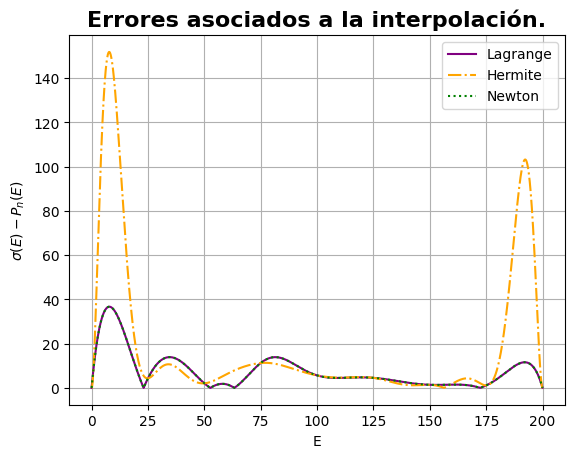

In [248]:
## Gráficos de errores asociados a la interpolación
error_poli_lagrange = seccion_eficaz(dom_energia, 78, 55, vals_sig_0[0]) - lagrange_seccion_eficaz_lamb(dom_energia)
error_poli_hermite = seccion_eficaz(dom_energia, 78, 55, vals_sig_0[0]) - hermite_seccion_eficaz_lamb(dom_energia)
error_poli_newton = seccion_eficaz(dom_energia, 78, 55, vals_sig_0[0]) - newton_seccion_eficaz_lamb(dom_energia)

# Now you can plot the errors
plt.title('Errores asociados a la interpolación.', fontsize=16, fontweight='bold')
plt.plot(dom_energia, np.abs(error_poli_lagrange), 'purple', linestyle='solid', label='Lagrange')
plt.plot(dom_energia, np.abs(error_poli_hermite), 'orange', linestyle='-.', label='Hermite')
plt.plot(dom_energia, np.abs(error_poli_newton), 'green', linestyle=':', label='Newton')
plt.legend()
plt.xlabel('E')
plt.ylabel(r'$\sigma(E) - P_n(E)$')
plt.grid()
plt.show()

Los mejores polinomios para la interpolación de los datos corresponde a los de Lagrange y el de Newton, los cuales se superponen en el gráfico de errores y de interpolación.
El error de cada polinomio es similar en los extremos del intervalo, pero el de Hermite es mucho más pronunciado, lo que aumenta el error.

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

In [249]:
# Función f y P_n(x)
n_values = [4 * i for i in range(1,6)]

# Función f(x) implícita y simbólica y su derivada
x = sym.symbols('x')
f_expr = 1 / (1 + 25 * x ** 2)
f_expr_prime = sym.diff(f_expr, x)
f_expr_prime_lamb = sym.lambdify(x, f_expr_prime, 'numpy')
f = lambda t: 1 / (1 + 25 * t ** 2)

dominio = np.linspace(-1, 1, 500)  # Para mayor suavidad del gráfico
rango = f(dominio)

El error asociado a la interpolación para P_4(x) en x=0.5 es: R_4(0.5)=0.0



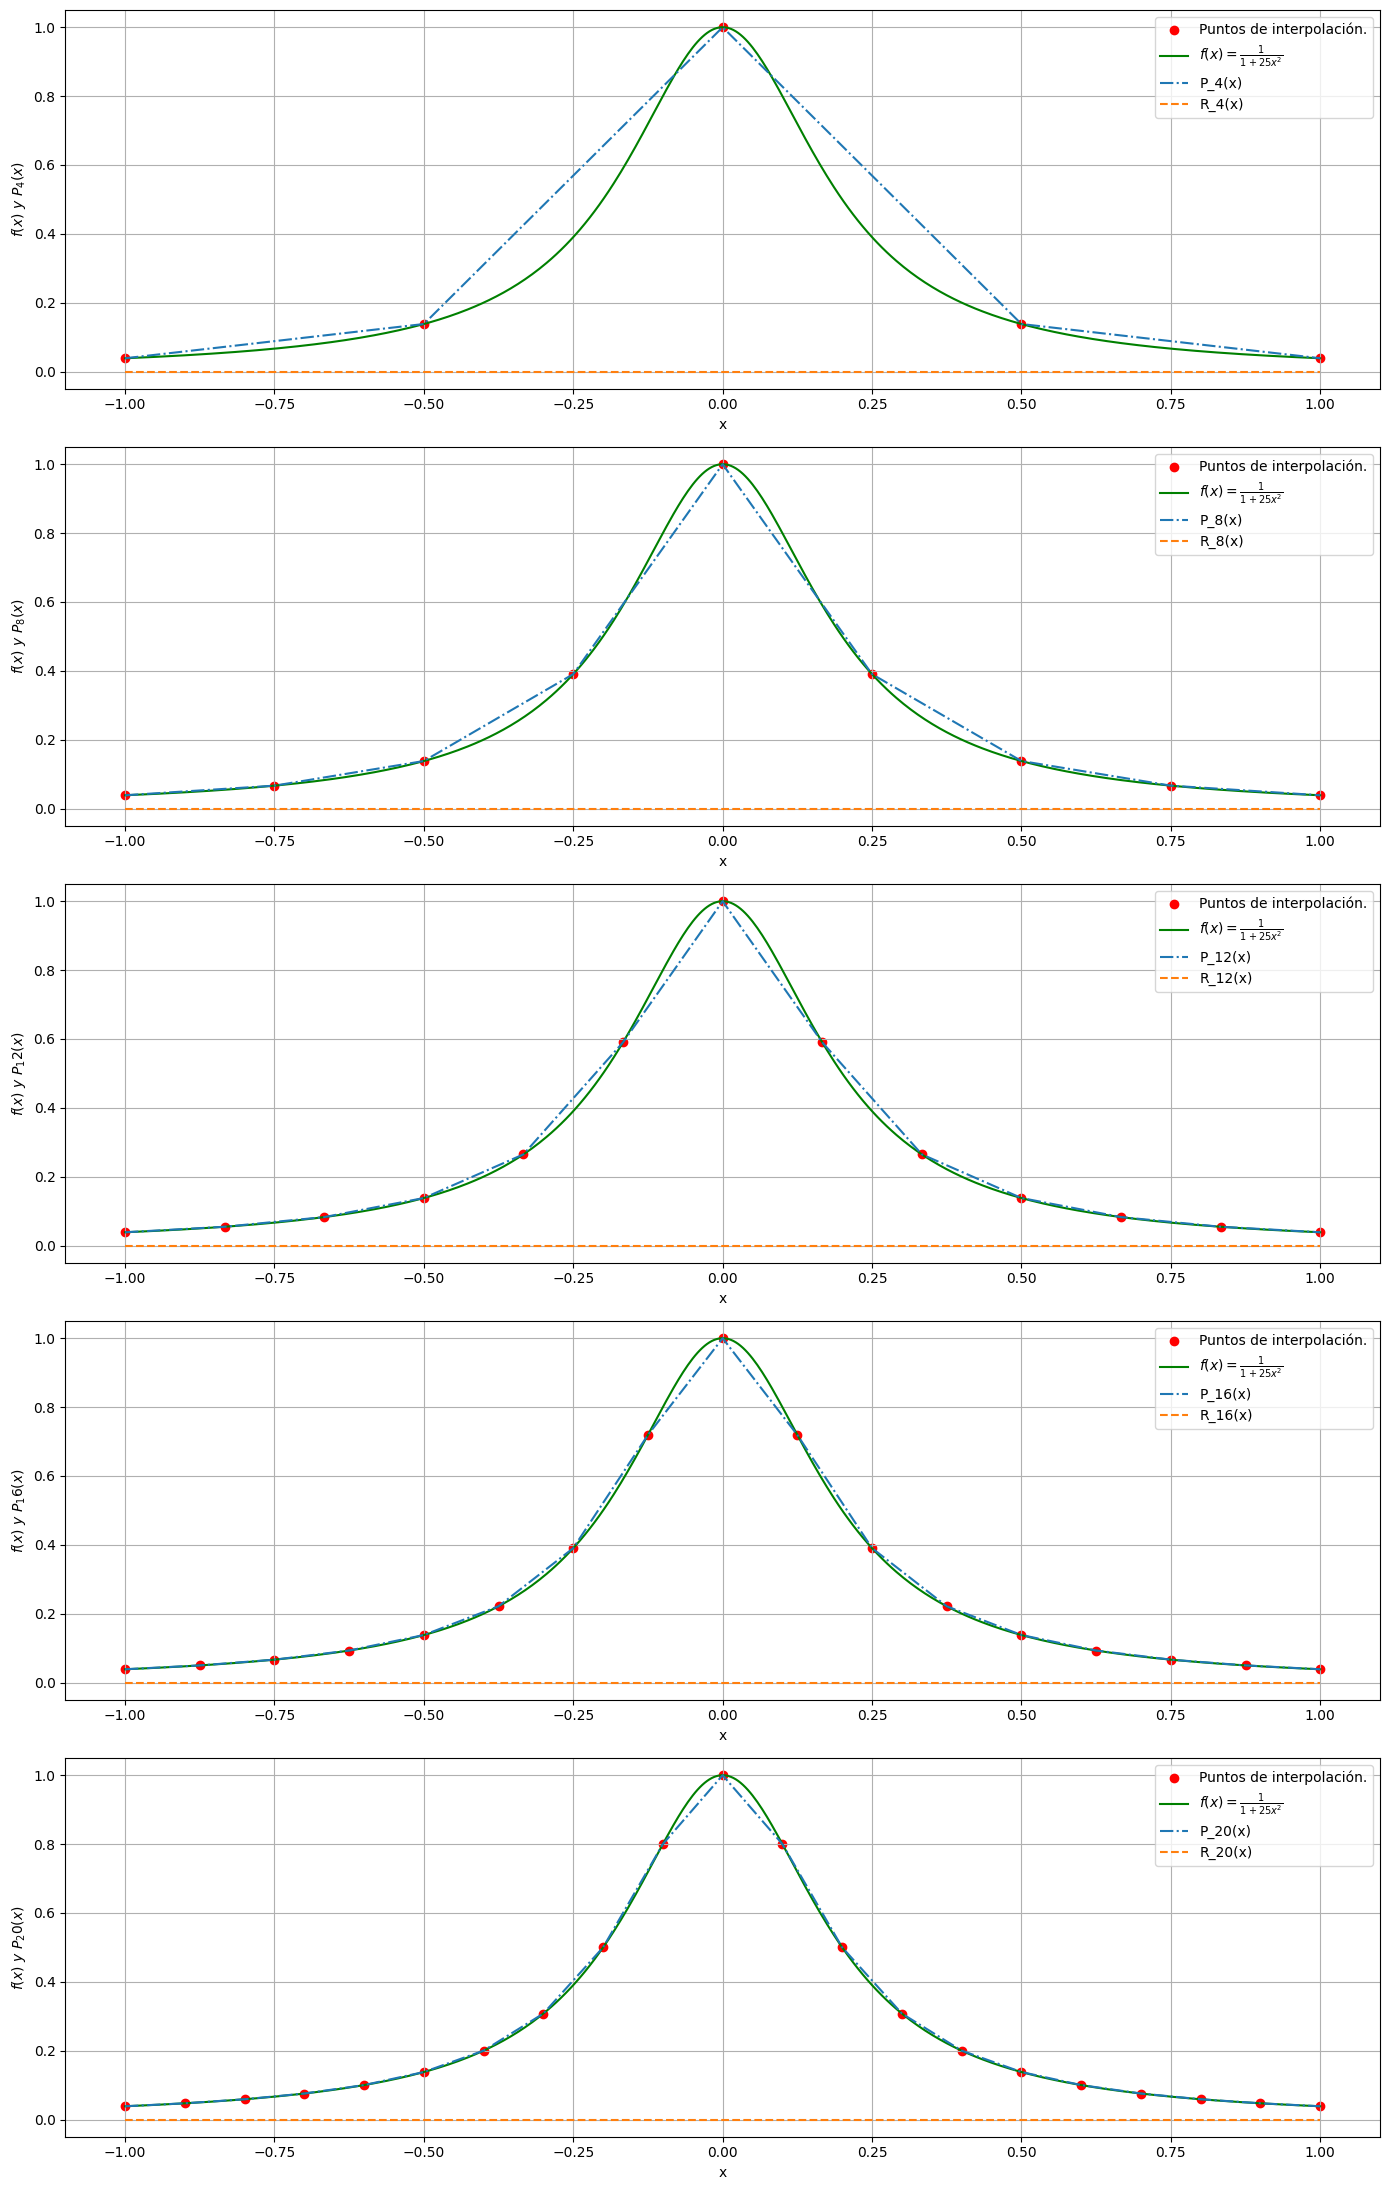

In [250]:
# Gráficos para polinomio de Lagrange
fig, ax = plt.subplots(5, 1, figsize=(14, 22))
for n, i in zip(n_values, range(5)):

  # Función de interpolación
  dominio_p = np.linspace(-1, 1, n + 1)
  p_n = polinomio_lagrange(dominio_p, f(dominio_p))  # Polinomio de interpolación
  p_n_lamb = sym.lambdify(x, p_n, 'numpy')  # Polinomio como función implícita

  # Función de error para cada polinomio
  r_n = error_r_n(f_expr, dominio_p)
  r_n_lamb = sym.lambdify(x, r_n, 'numpy')
  # Función error para R_4(x) en x=0.5
  if n == 4:
    print(f'El error asociado a la interpolación para P_{n}(x) en x=0.5 es: R_{n}(0.5)={r_n_lamb(0.5)}')
    print()

  # Gráficos
  ax[i].scatter(dominio_p, f(dominio_p), color='r', label='Puntos de interpolación.')  # Puntos por los que pasan el polinomio
  ax[i].plot(dominio, rango, color='g', label=r'$f(x) = \frac{1}{1+25x^2}$')  # función f(x)
  ax[i].plot(dominio_p, p_n_lamb(dominio_p), '-.', label=f'P_{n}(x)')  # Polinomio de Lagrange
  ax[i].plot(dominio_p, r_n_lamb(dominio_p), '--', label=f'R_{n}(x)')  # Función error evaluada en todo el dominio

  # Personalización
  ax[i].set_xlabel("x")
  ax[i].set_ylabel(f'$f(x) \ y \ P_{n}(x)$')
  # ax[i].set_ylim(-4, 1.2)
  ax[i].legend()
  ax[i].grid(True)
  plt.tight_layout()

# Ajustar el diseño
plt.tight_layout()
plt.show()

El error asociado a la interpolación para H_4(x) en x=0.5 es: R_4(0.5)=0.0



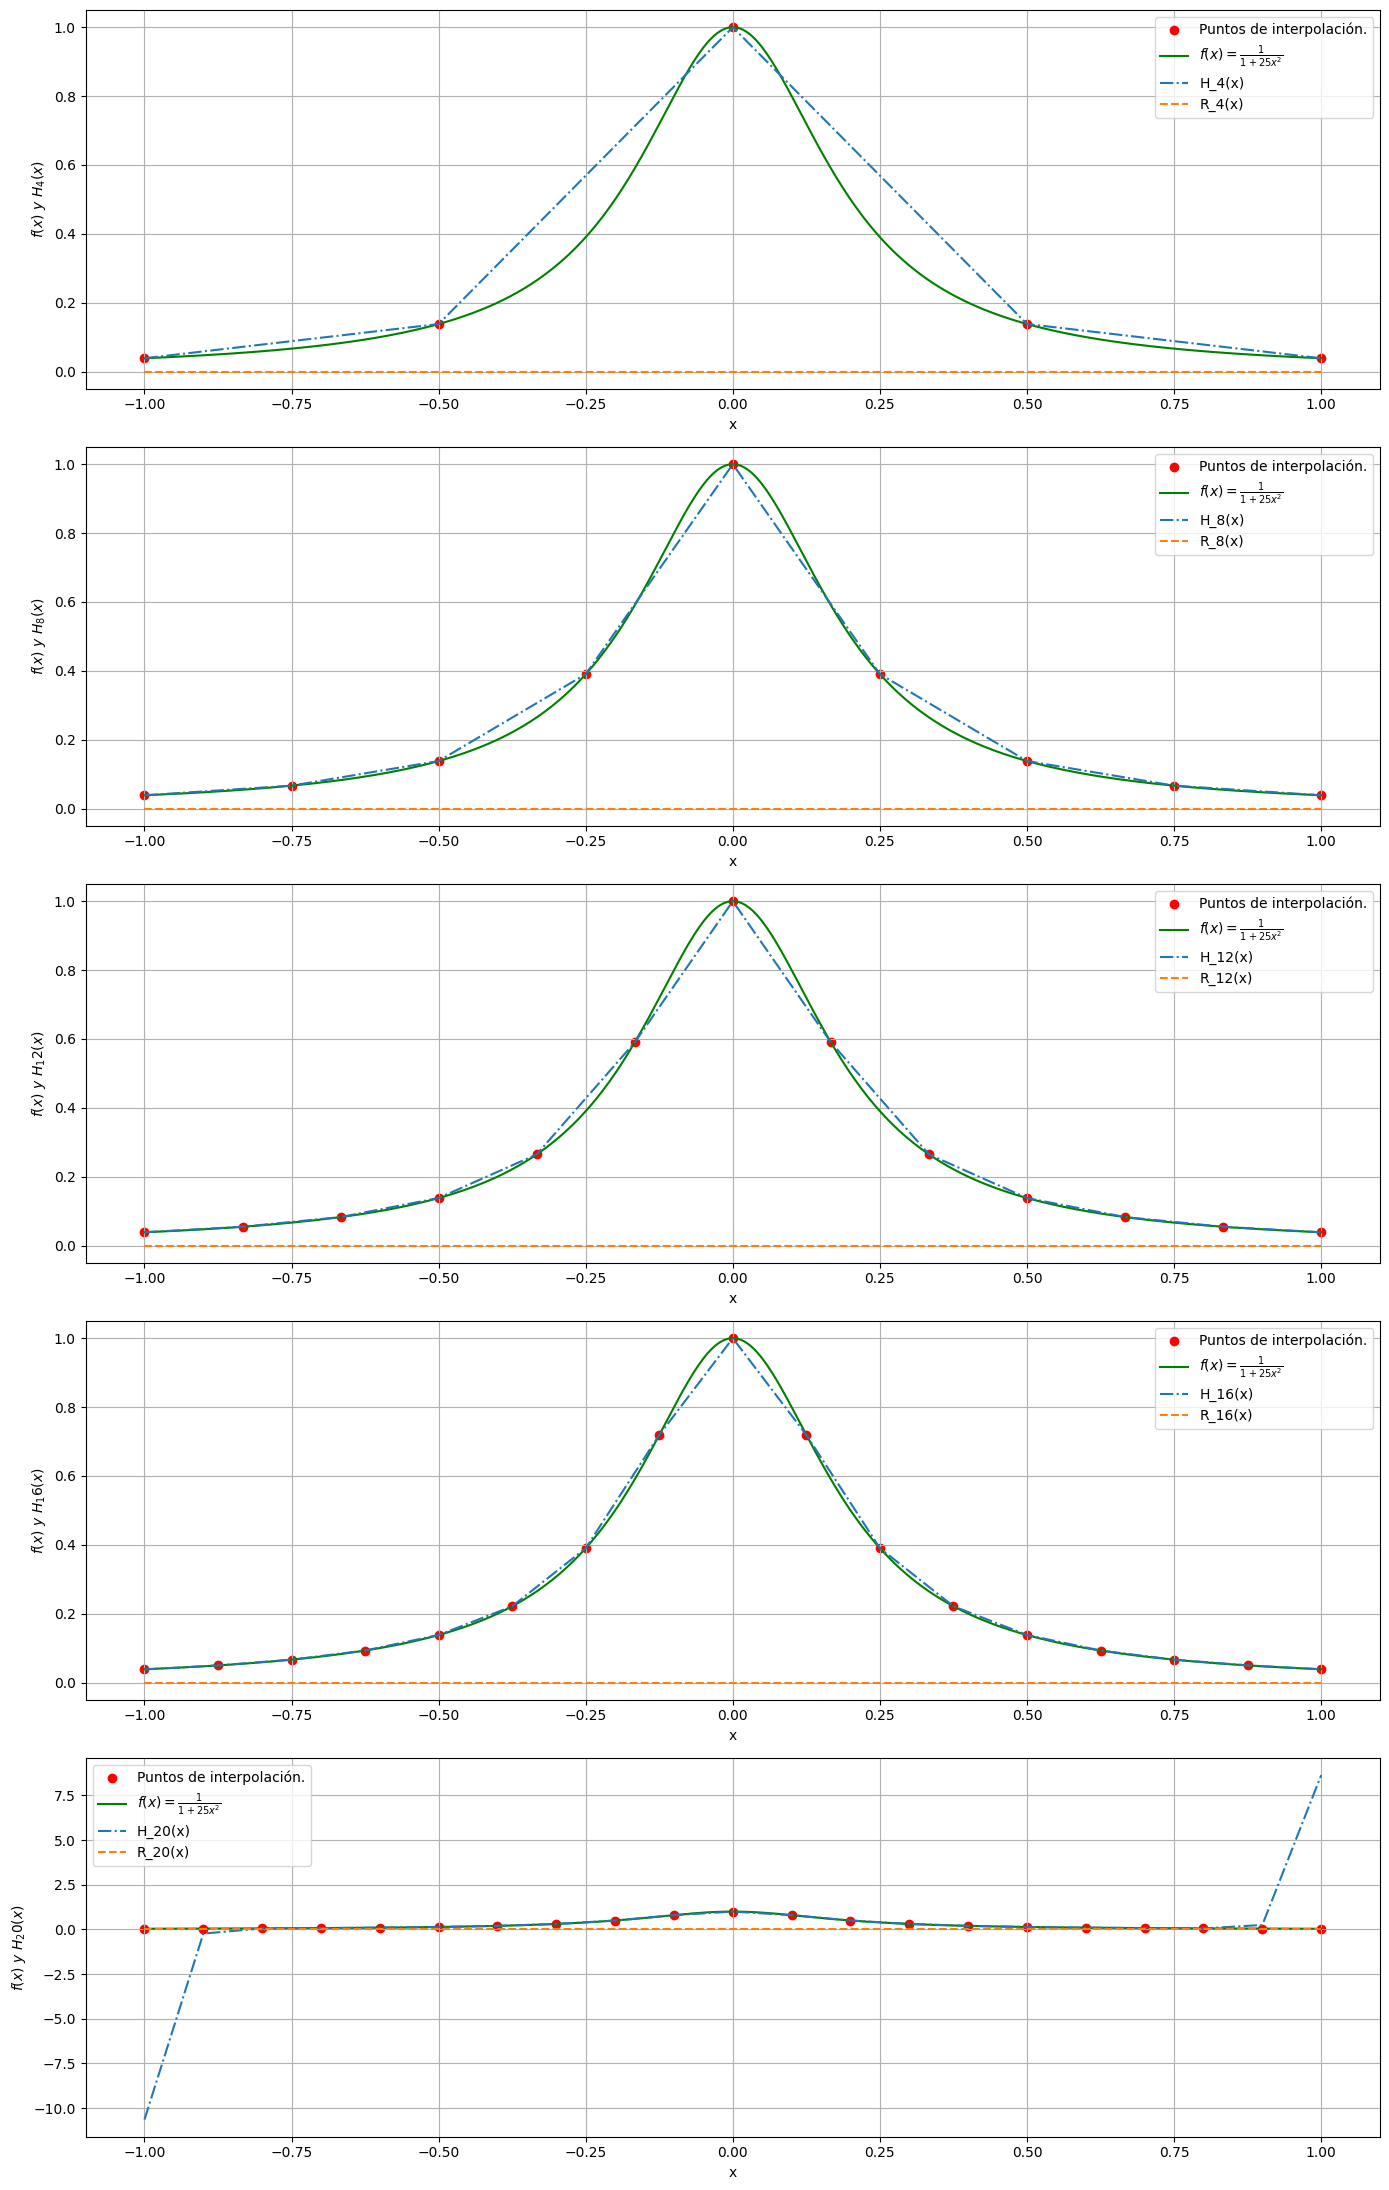

In [251]:
# Gráficos para los polinomios de Hermite
fig, axes = plt.subplots(5, 1, figsize=(14, 22))
for n, i in zip(n_values, range(5)):

  # Función de interpolación
  dominio_p = np.linspace(-1, 1, n + 1)
  derivatives = f_expr_prime_lamb(dominio_p)
  hermite_n = hermite_interpolation(dominio_p, f(dominio_p), derivatives)  # Polinomio de interpolación
  hermite_n_lamb = sym.lambdify(x, hermite_n, 'numpy')  # Polinomio como función implícita

  # Función de error para cada polinomio de Hermite
  r_n_hermite = error_hermite(f_expr, dominio_p)
  r_n_hermite_lamb = sym.lambdify(x, r_n_hermite, 'numpy')

  # Función error para R_4(x) en x=0.5
  if n == 4:
    print(f'El error asociado a la interpolación para H_{n}(x) en x=0.5 es: R_{n}(0.5)={r_n_hermite_lamb(0.5)}')
    print()

  # Gráficos
  axes[i].scatter(dominio_p, f(dominio_p), color='r', label='Puntos de interpolación.')  # Puntos por los que pasan el polinomio
  axes[i].plot(dominio, rango, color='g', label=r'$f(x) = \frac{1}{1+25x^2}$')  # función f(x)
  axes[i].plot(dominio_p, hermite_n_lamb(dominio_p), '-.', label=f'H_{n}(x)')  # Polinomio de Lagrange
  axes[i].plot(dominio_p, r_n_hermite_lamb(dominio_p), '--', label=f'R_{n}(x)')  # Función error evaluada en todo el dominio

  # Personalización
  axes[i].set_xlabel("x")
  axes[i].set_ylabel(f'$f(x) \ y \ H_{n}(x)$')
  # axes[i].set_ylim(-4, 1.2)
  axes[i].legend()
  axes[i].grid(True)
  plt.tight_layout()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Hay una diferencia en la interpolación por los polinomios de Hermite al considerar los puntos extremos, donde la aproximación genera oscilaciones muy notables. Así, la mejor forma de extrapolar los valores de la función a partir de los puntos dados con n={4, 8, 12, 16, 20} es por Lagrange.

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



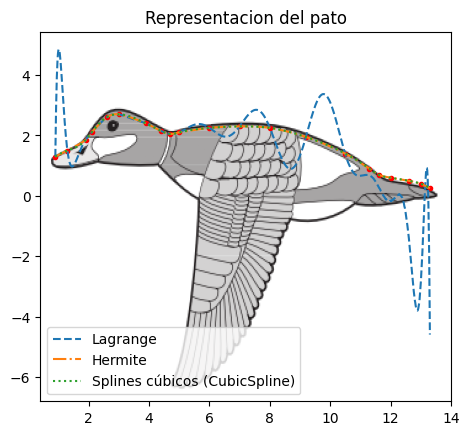

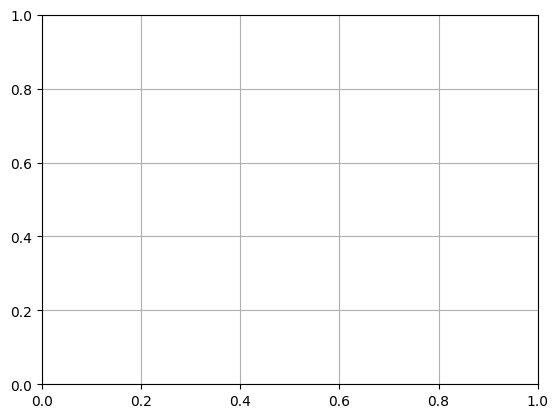

In [254]:
# 1) Representación gráfica del pato
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# 2) Puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Puntos para la interpolación
x = np.linspace(min(xp), max(xp), 1000)

# 3) Polinomios de Lagrange y Hermite
# Interpolación de Lagrange
poly_lagrange = lagrange(xp, yp)
# Interpolación de Hermite por CubicHermiteSpline
# Determinas las derivadas aproximadas de la función en los puntos dados.
def derivada_centrada(x, y):

  """
  Calcula la derivada aproximada usando diferencias finitas centradas.

  Args:
    x: array de puntos x.
    y: array de valores f(x).

    Returns:
      derivada: array de valores aproximados de la derivada.
  """

  derivada = np.zeros_like(x, dtype=float)
  # Para puntos interiores
  for i in range(1, len(x) - 1):
    derivada[i] = (y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1])
    # Para puntos extremos (usando diferencias finitas hacia adelante/atrás)
  derivada[0] = (y[1] - y[0]) / (x[1] - x[0])
  derivada[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
  return derivada

# Calcular las derivadas aproximadas para los puntos del pato
derivatives = derivada_centrada(xp, yp)
poly_hermite = CubicHermiteSpline(xp, yp, derivatives)
# 4) Interpolación por splines cúbicos (usando CubicSpline)
poly_splines = CubicSpline(xp, yp)

# Representación gráfica del pato y los puntos de definición
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r')
# Graficar las interpolaciones
plt.plot(x, poly_lagrange(x), label='Lagrange', linestyle='--')
plt.plot(x, poly_hermite(x), label='Hermite', linestyle='-.')
plt.plot(x, poly_splines(x), label='Splines cúbicos (CubicSpline)', linestyle=':')
plt.legend()
plt.show()
plt.grid()

5) La interpolación con splines cúbicos ofrece la mejor aproximación al dibujo del pato, con menos oscilaciones y una curva más suave. Los polinomios de Lagrange y Hermite presentan oscilaciones más pronunciadas, especialmente cerca de los extremos del intervalo.